In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

np.random.seed(1)

In [2]:
sim_data2 = pd.read_csv("sim_data2.csv")

In [3]:
sim_data2

,x1,x2,y
0,3.764052,1.630818,1
1,2.400157,1.760621,1
2,2.978738,3.099660,1
3,4.240893,2.655264,1
4,3.867558,2.640132,1
...,...,...,...
195,-0.171546,-0.761492,2
196,0.771791,0.857924,2
197,0.823504,1.141102,2
198,2.163236,1.466579,2


In [4]:
# Determine color based on `x1`
colors = sim_data2['x1']

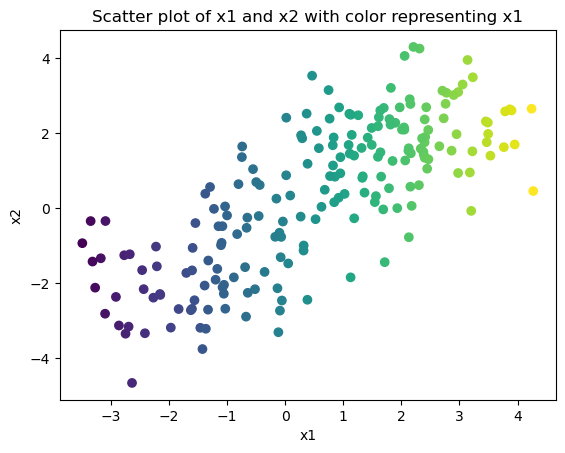

In [5]:
plt.scatter(sim_data2.x1,sim_data2.x2, c=colors, cmap="viridis")
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter plot of x1 and x2 with color representing x1')
plt.show()

In [6]:
X = sim_data2[['x1','x2']]
y = sim_data2[['y']]

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
X_scaled[:5]

array([[1.68633888, 0.6417978 ],
       [0.96604849, 0.70797582],
       [1.27160436, 1.39066557],
       [1.9381646 , 1.1640967 ],
       [1.74100153, 1.15638176]])

In [9]:
# Create the SVM model with RBF kernel
svm_rbf = svm.SVC(kernel='rbf', C=1.0, gamma='scale')

# Fit the model and store it in `svm_rbf_fit`
svm_rbf_fit = svm_rbf.fit(X_scaled, y)


C:\Users\Dennis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
svm_rbf_fit

SVC()

C:\Users\Dennis\AppData\Local\Temp\ipykernel_3316\2061672295.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolor='k', cmap='coolwarm')


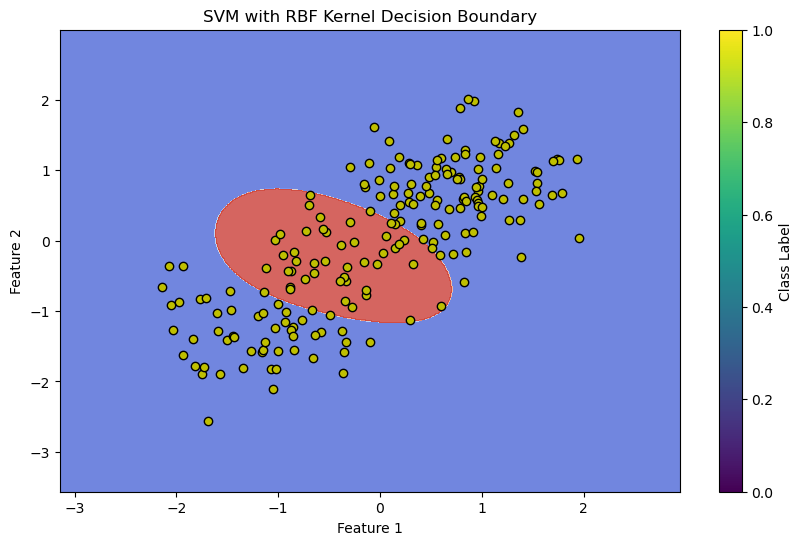

In [11]:
# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict over the mesh grid
Z = svm_rbf_fit.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create the plot
fit_plot = plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolor='k', cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM with RBF Kernel Decision Boundary')
plt.colorbar(label='Class Label')
plt.show()
